It is amazing to realize the fact that how machine learning can aid in such ambitions. The shopping complexes make use of their customers’ data and develop ML models to target the right ones. This not only increases sales but also makes the complexes efficient.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
mall=pd.read_csv("F:/shopping-data.csv")
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here we have the following features :
1. CustomerID: It is the unique ID given to a customer
2. Gender: Gender of the customer
3. Age: The age of the customer
4. Annual Income(k$): It is the annual income of the customer
5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

In [5]:
mall.shape

(200, 5)

In [7]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
mall=mall.drop_duplicates()

In [11]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
mall.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
a=["Age","Annual Income (k$)","Spending Score (1-100)"]

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
0.48556885096681657


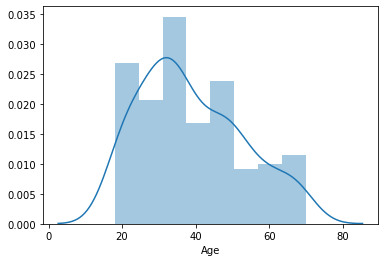

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
0.3218425498619055


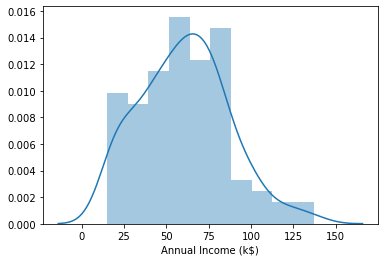

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
-0.047220201374263374


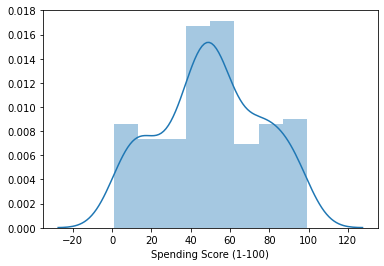

In [18]:
for i in a:
    print(mall[i].describe())
    print(mall[i].skew())
    sns.distplot(mall[i])
    plt.show()

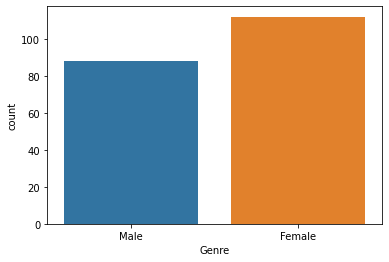

In [19]:
sns.countplot(x="Genre",data=mall)

In [20]:
data=mall.iloc[:,3:5]

In [21]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
from sklearn.cluster import KMeans
algo=KMeans(n_clusters=2)
algo.fit(data)

KMeans(n_clusters=2)

In [23]:
cen=algo.cluster_centers_

In [24]:
algo.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [25]:
algo.inertia_

181363.59595959607

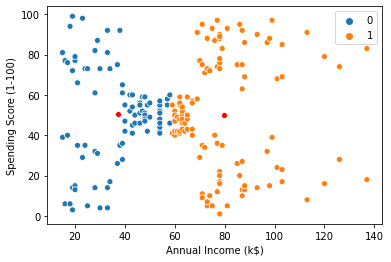

In [26]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=algo.labels_)
sns.scatterplot(cen[:,0],cen[:,1],color='r')

In [27]:
dis=[]
k=range(1,15)
for i in k:
    algo=KMeans(n_clusters=i)
    algo.fit(data)
    dis.append(algo.inertia_)

In [28]:
dis

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 31632.259809473468,
 25061.304119069322,
 21794.885609098194,
 19649.59658286696,
 17508.97057740007,
 16041.571587614306,
 14292.543823365135,
 13362.106470722269]

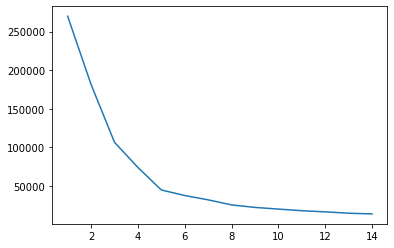

In [29]:
plt.plot(k,dis)
plt.show()

In [30]:
algo1=KMeans(n_clusters=5)
algo1.fit(data)

KMeans(n_clusters=5)

In [31]:
cen=algo1.cluster_centers_
cen

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

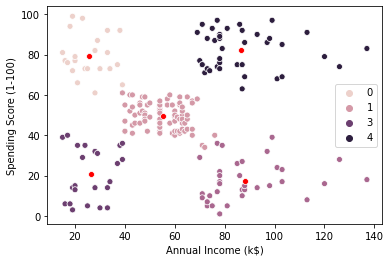

In [32]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=algo1.labels_)
sns.scatterplot(cen[:,0],cen[:,1],color='r')